In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/wheat_head')

In [3]:
!git clone https://github.com/ultralytics/yolov3.git

fatal: destination path 'yolov3' already exists and is not an empty directory.


In [4]:
os.chdir('yolov3')

In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=3917c132a62ba448b7648df22df78a6fb85a03b7c082e4b8fabe13314f0836e9
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Steps

1. Download the weights and keep it under weights folder and convert it to pytorch format



In [ ]:
#download weights
#converting weights
!python3  -c "from models import *; convert('cfg/yolov3.cfg', 'weights/yolov3.weights')"

Model Summary: 222 layers, 6.19491e+07 parameters, 6.19491e+07 gradients
Success: converted 'weights/yolov3.weights' to 'weights/yolov3.pt'


For steps 2 and 3 follow: https://github.com/ultralytics/yolov3/wiki/Train-Custom-Data


2. Make the data folder as required:
Use notebook prepare_traindata.ipynb

* With image and annotation file in required format. <br>
* Then train and val text files.<br>
* Then classes.names file containing class names.<br> 
* Also create *.data file containing path for train and test data and number of classes <br> 


3. Make changes to yolo configuration file:  ie, adjust the number of filters and classes as needed (as per the repo documents)


4. Train the model

In [ ]:
!python3 train.py --cfg cfg/yolov3.cfg --data data/custom/classes.data --weights=weights/yolov3.pt --epochs 50

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3.cfg', data='data/custom/classes.data', device='', epochs=50, evolve=False, freeze_layers=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-09-26 04:14:11.297536: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 222 layers, 6.15237e+07 parameters, 6.15237e+07 gradients
Optimizer groups: 75 .bias, 75 Conv2d.weight, 72 other
Caching labels data/custom/labels.npy (2698 found, 0 missing, 0 empty, 0 duplicate, for 2698 images): 100% 2698/2698 [00:00<00:00, 1390

## Visualize the results

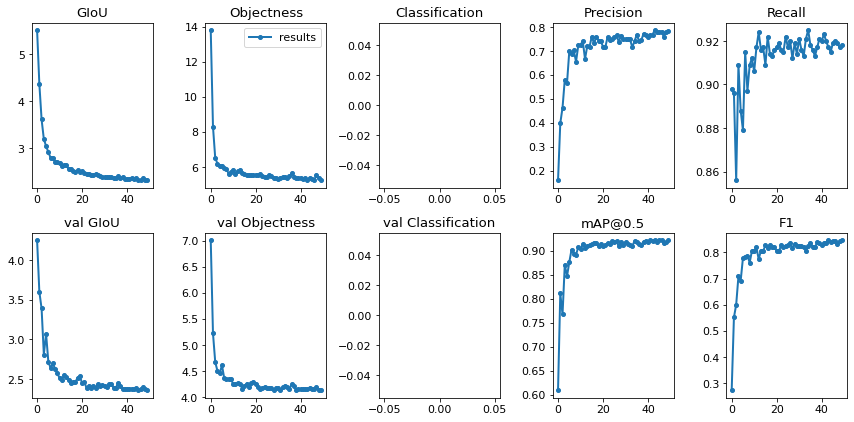

In [6]:
from utils import utils
utils.plot_results()

# Detection

In [11]:
# copy the test images to data/samples
# The following will save all images in output folder
!python3 detect.py --weights weights/best.pt --cfg cfg/yolov3.cfg  --names data/custom/classes.names 

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/custom/classes.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 222 layers, 6.15237e+07 parameters, 6.15237e+07 gradients
image 1/6 data/samples/00e903abe.jpg: 512x512 33 wheat_heads, Done. (0.020s)
image 2/6 data/samples/0d82ef017.jpg: 512x512 54 wheat_heads, Done. (0.020s)
image 3/6 data/samples/0e0e3b0b9.jpg: 512x512 77 wheat_heads, Done. (0.029s)
image 4/6 data/samples/0eab1baab.jpg: 512x512 49 wheat_heads, Done. (0.020s)
image 5/6 data/samples/1a39607ca.jpg: 512x512 35 wheat_heads, Done. (0.020s)
image 6/6 data/samples/1b99d2fd6.jpg: 512x512 33 wheat_heads, Done. (0.020s)
Results saved to /content/drive/My Drive/wheat_head/yolov3/output
Done. (4

In [15]:
from skimage import io
import matplotlib.pyplot as plt



images = os.listdir('output')
for image in images:
  plt.figure(figsize=(20,20))
  img = io.imread(os.path.join('output',image))
  plt.imshow(img)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Results

* We got pretty good results with yolov3 with and average precision of 0.922. Model was almost converging at 41th epoch. 

* Also we got a good recall value of 0.91 and F1 score of 0.84